<a href="https://colab.research.google.com/github/saptarshimazumdar/deep-learning-concepts/blob/a2q11/activations/dying-relu-observation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**11**

Implement a two-layer neural network with 2 input neurons, 10 hidden neurons, and 1 output neuron using ReLU activation in the hidden layer to solve the XOR classification problem. Investigate how the learning rate and bias initialization affect the dying ReLU phenomenon.Weights are initialized as
$$W_{ij} \sim {N}(0, 0.01)$$
unless stated otherwise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# XOR dataset
X = np.array([[0.,0.],
              [0.,1.],
              [1.,0.],
              [1.,1.]])
y = np.array([[0.],
              [1.],
              [1.],
              [0.]])

In [3]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def binary_cross_entropy(_y, _y_pred, _tolerance=1e-15):
  _y_pred = np.clip(_y_pred, _tolerance, 1 - _tolerance)
  return -np.mean(_y * np.log(_y_pred) + (1 - _y) * np.log(1 - _y_pred))

#### **Clarification**
Using BCE Loss, since it is a classification problem

In [4]:
def train(lr, bias_init, epochs):

    # Initialize weights N(0, 0.01)
    W1 = np.random.normal(0, 0.01, (2, 10))
    W2 = np.random.normal(0, 0.01, (10, 1))

    # Initialize biases
    if bias_init == -5.0:
      b1 = np.full((1, 10), -5.0)
    elif bias_init == 0.0:
      b1 = np.zeros((1, 10))
    elif bias_init == "random":
      b1 = np.random.normal(0, 0.01, (1, 10))

    b2 = np.zeros((1, 1))

    losses = []
    dead_fraction = []
    accuracies = []

    for epoch in range(epochs):

      # ----- Forward pass -----
      z1 = np.dot(X, W1) + b1
      a1 = relu(z1)

      z2 = np.dot(a1, W2) + b2
      a2 = sigmoid(z2)

      # BCE loss
      loss = binary_cross_entropy(y, a2)
      losses.append(loss)

      # ----- Dead neuron fraction -----
      dead = np.mean(np.all(a1 == 0, axis=0))
      dead_fraction.append(dead)

      # ----- Accuracy -----
      preds = (a2 > 0.5).astype(float)
      acc = np.mean(preds == y)
      accuracies.append(acc)

      # ----- Backpropagation -----
      N = X.shape[0]
      dz2 = a2 - y
      dW2 = np.dot(a1.T, dz2) / N
      db2 = np.mean(dz2, axis=0, keepdims=True)

      da1 = np.dot(dz2, W2.T)
      dz1 = da1 * relu_derivative(z1)

      dW1 = np.dot(X.T, dz1) / N
      db1 = np.mean(dz1, axis=0, keepdims=True)

      # ----- Update -----
      W2 -= lr * dW2
      b2 -= lr * db2
      W1 -= lr * dW1
      b1 -= lr * db1

    return losses, dead_fraction, accuracies

In [5]:
def run_case(case_id, lr, bias_init, epochs):
  np.random.seed(2)
  losses, dead, acc = train(lr, bias_init, epochs)

  fig, axs = plt.subplots(1, 3, figsize=(16, 4))
  fig.suptitle(f"Case {case_id}: lr={lr}, bias={bias_init}, epochs={epochs}")

  axs[0].plot(losses)
  axs[0].grid()
  axs[0].set_title("Training Loss")

  axs[1].plot(dead)
  axs[1].grid()
  axs[1].set_title("Fraction of Dead Hidden Neurons")

  axs[2].plot(acc)
  axs[2].grid()
  axs[2].set_title("Accuracy")

  plt.tight_layout()
  plt.show()



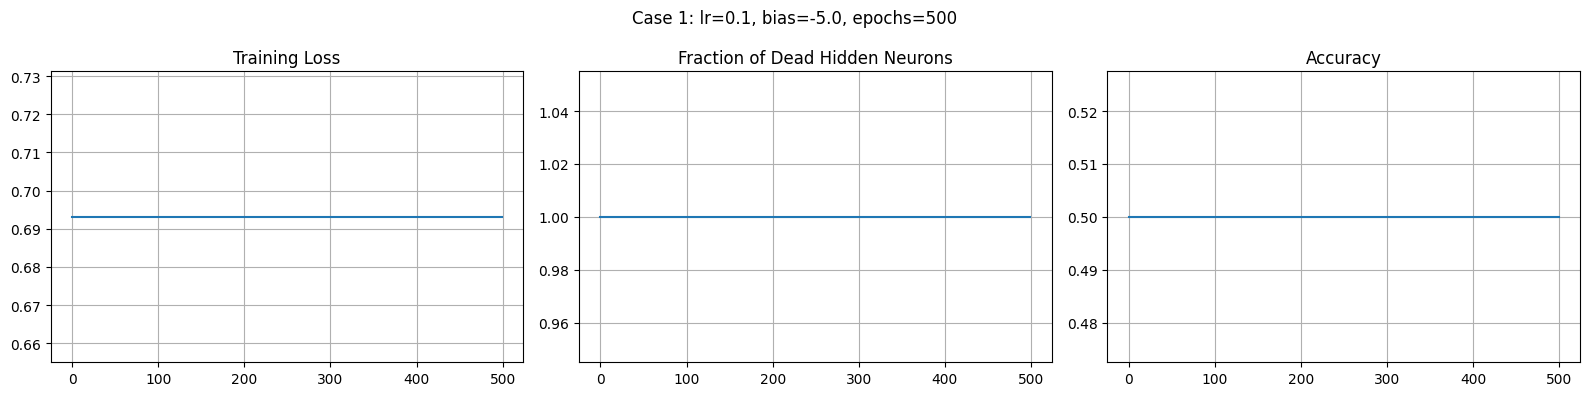

In [6]:
run_case(1, 0.1,  -5.0, 500)

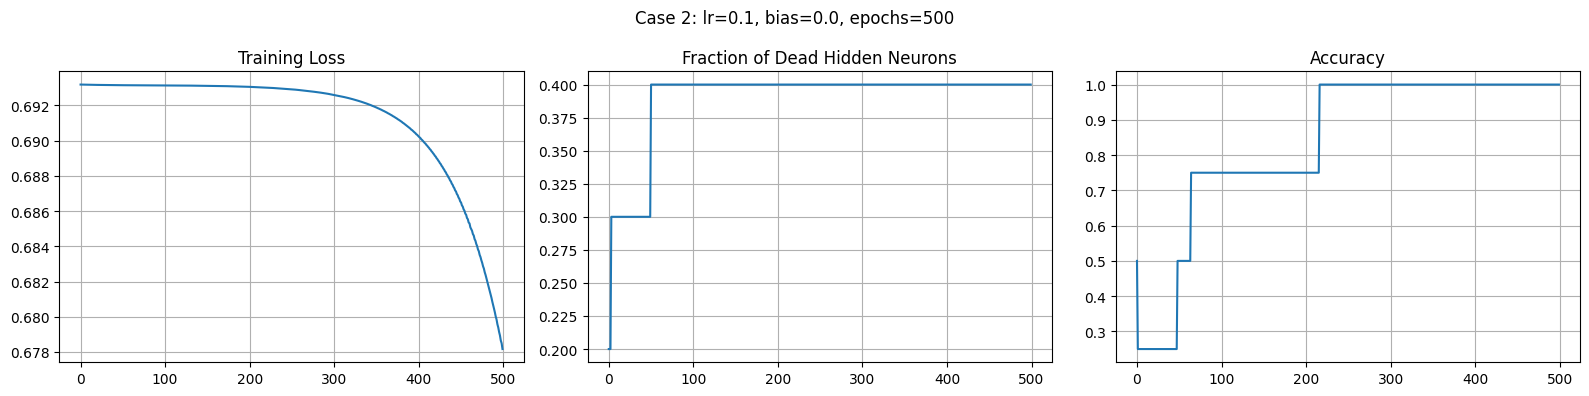

In [7]:
run_case(2, 0.1,  0.0, 500)

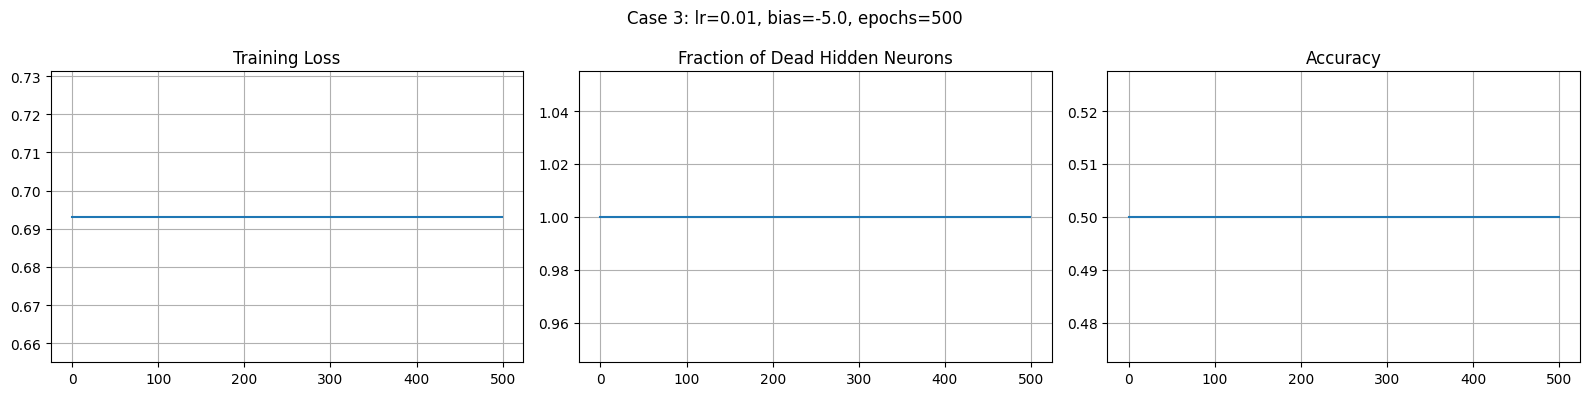

In [8]:
run_case(3, 0.01, -5.0, 500)

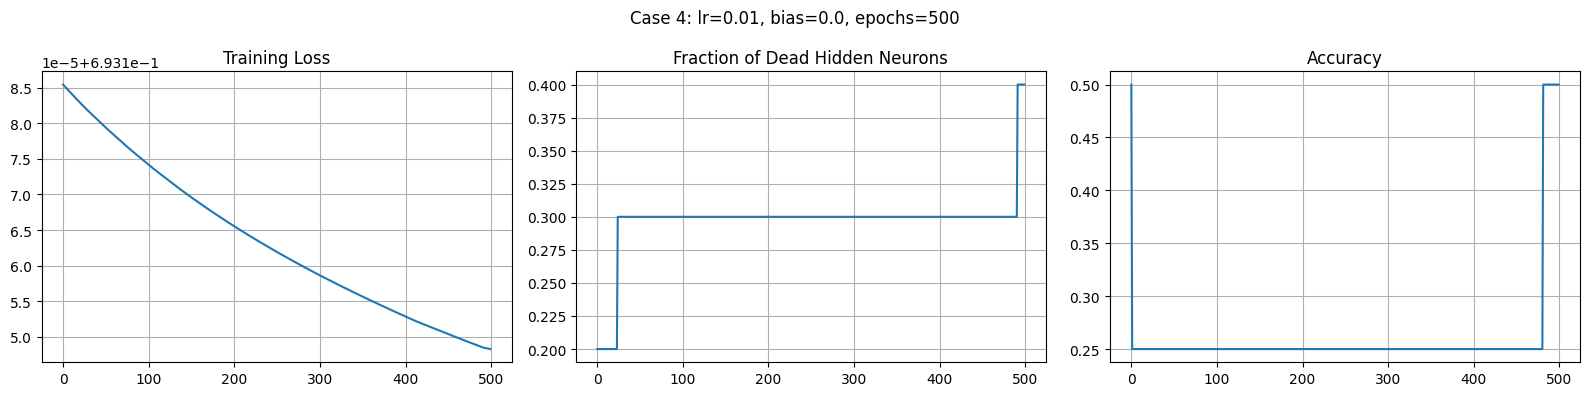

In [9]:
run_case(4, 0.01, 0.0, 500)

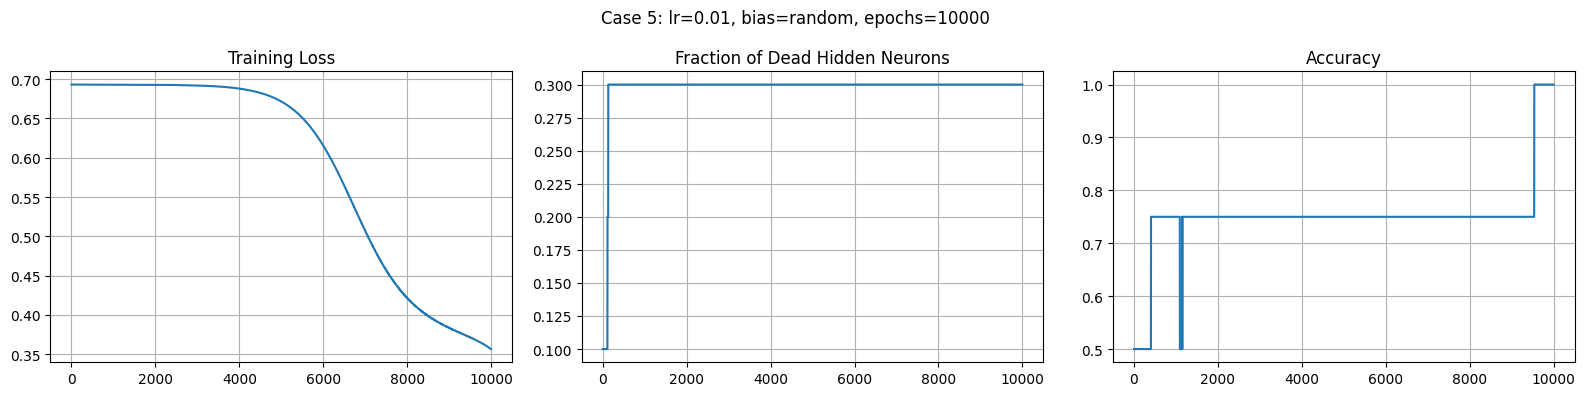

In [10]:
run_case(5, 0.01, 'random', 10000)

### **Observations**

<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr>
      <th>Case</th>
      <th>Configuration</th>
      <th>Training Behavior</th>
      <th>Dead Neurons</th>
      <th>Accuracy</th>
      <th>Conclusion</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Case 1</td>
      <td>lr = 0.1, bias = -5.0, epochs = 500</td>
      <td>Loss does not decrease meaningfully</td>
      <td>≈ 100% dead neurons</td>
      <td>≈ 50%</td>
      <td>Severe dying ReLU</td>
    </tr>
    <tr>
      <td>Case 2</td>
      <td>lr = 0.1, bias = 0.0, epochs = 500</td>
      <td>Unstable training; partial learning (visualized in multiple runs)</td>
      <td>Some neurons die</td>
      <td>Varies (often unstable) (Observed in multiple runs)</td>
      <td>Moderate dying ReLU due to large learning rate</td>
    </tr>
    <tr>
      <td>Case 3</td>
      <td>lr = 0.01, bias = -5.0, epochs = 500</td>
      <td>No learning</td>
      <td>All dead neirons</td>
      <td>≈ 50%</td>
      <td>Dying ReLU caused by negative bias</td>
    </tr>
    <tr>
      <td>Case 4</td>
      <td>lr = 0.01, bias = 0.0, epochs = 500</td>
      <td>Smooth convergence</td>
      <td>Few dead neurons</td>
      <td>≈ (50% - 80%) (Observed in multiple runs)</td>
      <td>Somewhat healthy training</td>
    </tr>
    <tr>
      <td>Case 5</td>
      <td>lr = 0.01, bias = random, epochs = 10000</td>
      <td>Stable convergence</td>
      <td>Low dead fraction</td>
      <td>≈ 100%</td>
      <td>Nice overall performance</td>
    </tr>
  </tbody>
</table>


### **Dead ReLU neurons unable to recover through gradient descent**

A ReLU activation is defined as:

$$\text{ReLU}(z) = \max(0, z)$$

Its derivative is:

$$\frac{d}{dz}\text{ReLU}(z) =
  \begin{cases}
    1 & \text{if } z > 0 \\
    0 & \text{if } z \le 0
  \end{cases}
$$

---

A hidden neuron is **dead** if its pre-activation value is non-positive for all inputs:
$z = Wx + b \le 0 \quad \text{for every training sample} $

This implies: $a = \text{ReLU}(z) = 0$ for all inputs.

---

Using the chain rule, the gradient of the loss (L) with respect to the weights (W) is:

$$ \frac{\partial L}{\partial W} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial W} $$

But if the neuron is dead:
$\frac{\partial a}{\partial z} = 0$

Therefore, $\frac{\partial L}{\partial W} = 0$

and similarly, $\frac{\partial L}{\partial b} = 0$

---

Gradient descent updates parameters as: $W \leftarrow W - \eta \frac{\partial L}{\partial W}$

If $\frac{\partial L}{\partial W} = 0$

then: $W_{\text{new}} = W$

The weights and bias never change, meaning:

* The neuron stays in the negative region
* It keeps outputting zero
* It never receives gradient again

This creates a **zero-gradient trap**, making recovery impossible under standard gradient descent.


#### **Intuition**

A dead ReLU neuron:

* Produces zero output
* Sends no signal forward
* Receives no gradient backward

Without gradient flow learning cannot occur, so the neuron remains permanently inactive.